In [5]:
# Import necessary libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
conn = sqlite3.connect('deathdata.db')

# Define the SQL query
query = """
SELECT 
    Year,
    SUM("Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number)") AS "Nature Disasters",
    SUM("Deaths - Meningitis - Sex: Both - Age: All Ages (Number)"
        + "Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)"
        + "Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)"
        + "Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)"
        + "Deaths - Malaria - Sex: Both - Age: All Ages (Number)"
        + "Deaths - Drowning - Sex: Both - Age: All Ages (Number)"
        + "Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)"
        + "Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)"
        + "Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)"
        + "Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)"
        + "Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)"
        + "Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)"
        + "Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)"
        + "Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)"
        + "Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)"
        + "Deaths - Self-harm - Sex: Both - Age: All Ages (Number)"
        + "Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number)"
        + "Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number)"
        + "Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)"
        + "Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number)"
        + "Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number)"
        + "Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)"
        + "Deaths - Poisonings - Sex: Both - Age: All Ages (Number)"
        + "Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number)"
        + "Deaths - Road injuries - Sex: Both - Age: All Ages (Number)"
        + "Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)"
        + "Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)"
        + "Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number)"
        + "Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)"
        + "Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)"
        + "Deaths - Measles - Sex: Both - Age: All Ages (Number)"
    ) AS "Other Deaths"
FROM death_causes
WHERE Entity = 'World' AND ((Year BETWEEN 1990 AND 1994) OR (Year BETWEEN 2014 AND 2019))
GROUP BY Year
"""

# Execute the SQL query and fetch data into a DataFrame
data = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Display the first few rows of the DataFrame to ensure it loaded correctly


In [ ]:
# Process data to sum up the two periods
result = data.groupby((data['Year'] < 2000) * 1).sum()
result.index = ['1990-1994', '2014-2019']

# Data for plotting
categories = ['Nature Disasters', 'Other Deaths']

print(data.head())

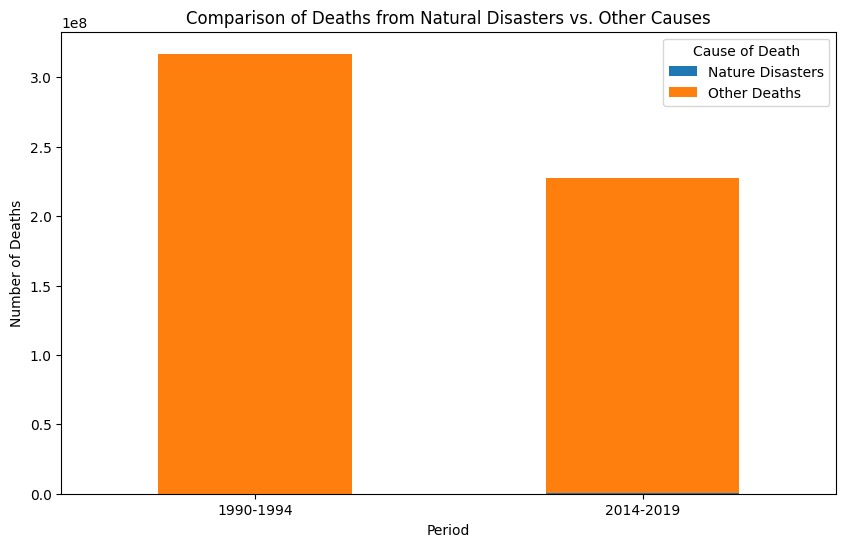

In [8]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
result[categories].plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Comparison of Deaths from Natural Disasters vs. Other Causes')
ax.set_xlabel('Period')
ax.set_ylabel('Number of Deaths')
plt.xticks(rotation=0)  # Keep the labels horizontal
plt.legend(title='Cause of Death')
plt.show()